# Belajar Machine Learning: Dasar

## Dataset: Melbourne Housing

### Importing ```pandas```
Pandas merupakan module untuk melakukan analisis data

In [1]:
import pandas as pd

### Memuat dataset sebagai ```pandas.DataFrame```

In [2]:
file_path = './dataset/melb_data.csv'
housing_df = pd.read_csv(file_path)
housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Explorasi Awal

### Menampilkan dimensi dataset

In [3]:
housing_df.shape

(13580, 21)

#### Menampilkan daftar nama kolom

In [4]:
housing_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### Ringkasan data (summary)

In [5]:
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### Kasus: menampilkan ukuran tanah terluas

In [6]:
housing_df.describe().loc['max', 'Landsize']

433014.0

In [7]:
housing_df.describe()['Landsize']['max']

433014.0

## Machine Learning Model: Dasar

### Pembersihan data (data cleaning)

In [8]:
housing_df = housing_df.dropna()

In [9]:
housing_df.shape

(6196, 21)

### Memilih target prediksi (prediction target)

In [10]:
y = housing_df['Price']
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

### Memilih fitur (features selection)

In [11]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = housing_df[features]
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025


In [12]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


### Membangun model
Membangun machine learning model dengan Decision Tree Regressor

#### Importing DecisionTreeRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

#### Konfigurasi model

In [14]:
housing_model = DecisionTreeRegressor(random_state=1)

#### Training model

In [15]:
housing_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

#### Melakukan prediksi

In [16]:
housing_model.predict(X.head())

array([1035000., 1465000., 1600000., 1876000., 1636000.])

In [17]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

## Evaluasi mode (model evaluation)
Melakukan validasi/evaluasi terhadap model

### Importing evaluation metric (```mean_absolute_error```)

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
y_hat = housing_model.predict(X)
mean_absolute_error(y, y_hat)

1115.7467183128902

### Training dan Testing dataset

In [20]:
from sklearn.model_selection import train_test_split

#### Membagi datasset menjadi dua bagian

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#### Konfigurasi dan training model

In [22]:
housing_model = DecisionTreeRegressor(random_state=1)
housing_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

#### Evaluasi model

In [23]:
y_hat = housing_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

251688.7630729503

## Optimasi model

In [24]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    return mae

Membandingkan MAE dengan beberapa nilai ```max_leaf_nodes``` untuk menemukan jumlah leaf paling optimum

In [25]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 369673
Max leaf nodes: 50 	 Mean Absolute Error: 266644
Max leaf nodes: 500 	 Mean Absolute Error: 243613
Max leaf nodes: 5000 	 Mean Absolute Error: 256227


## Ekplorasi dengan Random Forrest

Membangun machine learning model dengan Random Forrest Regressor

#### Importing RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}')

Mean Absolute Error: 190414


## Referensi Belajar
### Seri Belajar Machine Learning dengan Python Scikit-Learn

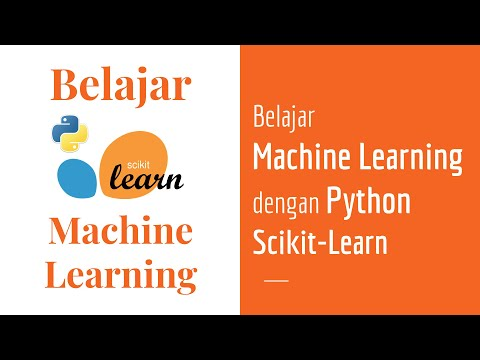

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('Rk1VmHk_kUo')

### Seri Belajar Visualisasi Data dengan Python Matplotlib

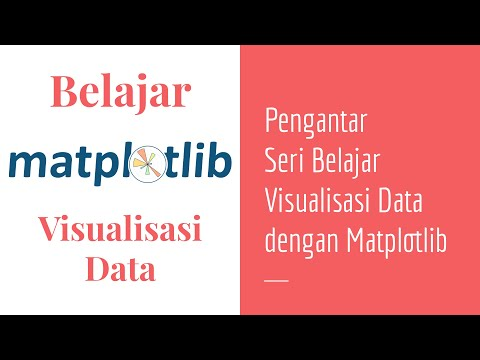

In [29]:
YouTubeVideo('zB3ptHg3piI')

### Seri Belajar Python Pandas Data Frame

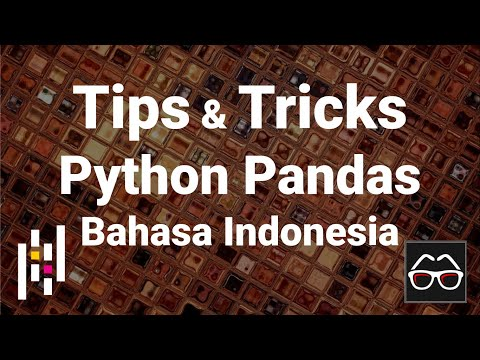

In [30]:
YouTubeVideo('RTxNv6ngTSc')